### 1. 전진선택법(Forward Selection)
### 2. 후진소거법(Backward Elimination)
### 3. 단계적선택법(Stepwise Selection)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
last = pd.read_excel("data/last_자전거이용비율수정.xlsx")
last.head()

,Unnamed: 0,동,경사도,자전거도로길이,총거치대수,총대여수,비율,인구,면적,인구밀도,지하철역개수,버스정거장개수,접근성,교통편,자전거이용비율
0,0,가락1동,-15.5247,7150,115.0,74652.0,64914.78,27716,1.34,20684,1,13,12.686567,17,2.693462
1,1,가락2동,-39.3115,4704,45.0,33583.0,74628.89,33920,0.96,35333,0,23,23.958333,23,0.990065
2,2,가락본동,-30.7845,6932,55.0,25487.0,46340.00,27876,1.13,24669,2,25,29.203540,33,0.914299
3,3,가리봉동,-21.8088,0,10.0,5621.0,56210.00,15250,0.40,38125,0,9,22.500000,9,0.368590
4,4,가산동,-12.9490,2108,258.0,160033.0,62028.29,24455,2.52,9704,2,111,47.222222,119,6.543979


In [3]:
sb = pd.read_excel("data/행정동_Starbucks.xlsx")
sb.head()

,ADM_DR_NM_,Cnt_ADM_DR
0,가락1동,2
1,가락2동,2
2,가락본동,2
3,가산동,7
4,가양1동,5


In [4]:
sb.columns=['동', '스타벅스매장수']

In [5]:
all = pd.merge(last, sb, on='동', how='outer')
display(all.head())

,Unnamed: 0,동,경사도,자전거도로길이,총거치대수,총대여수,비율,인구,면적,인구밀도,지하철역개수,버스정거장개수,접근성,교통편,자전거이용비율,스타벅스매장수
0,0,가락1동,-15.5247,7150,115.0,74652.0,64914.78,27716,1.34,20684,1,13,12.686567,17,2.693462,2.0
1,1,가락2동,-39.3115,4704,45.0,33583.0,74628.89,33920,0.96,35333,0,23,23.958333,23,0.990065,2.0
2,2,가락본동,-30.7845,6932,55.0,25487.0,46340.00,27876,1.13,24669,2,25,29.203540,33,0.914299,2.0
3,3,가리봉동,-21.8088,0,10.0,5621.0,56210.00,15250,0.40,38125,0,9,22.500000,9,0.368590,NaN
4,4,가산동,-12.9490,2108,258.0,160033.0,62028.29,24455,2.52,9704,2,111,47.222222,119,6.543979,7.0


In [6]:
all = all.drop(all.columns[[0, 6, 9, 12, 13, 14]], axis=1) # 사용할 칼럼만 남기기

In [7]:
all = all.set_index('동')

In [8]:
all.head()

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수
동,,,,,,,,,
가락1동,-15.5247,7150,115.0,74652.0,27716,1.34,1,13,2.0
가락2동,-39.3115,4704,45.0,33583.0,33920,0.96,0,23,2.0
가락본동,-30.7845,6932,55.0,25487.0,27876,1.13,2,25,2.0
가리봉동,-21.8088,0,10.0,5621.0,15250,0.40,0,9,NaN
가산동,-12.9490,2108,258.0,160033.0,24455,2.52,2,111,7.0


In [9]:
all_mean = all.mean()['자전거도로길이']
print(all_mean)

2971.6132075471696


In [10]:
all['자전거도로길이'] = all['자전거도로길이'].replace(0, all_mean)

In [11]:
display(all.head())

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수
동,,,,,,,,,
가락1동,-15.5247,7150.000000,115.0,74652.0,27716,1.34,1,13,2.0
가락2동,-39.3115,4704.000000,45.0,33583.0,33920,0.96,0,23,2.0
가락본동,-30.7845,6932.000000,55.0,25487.0,27876,1.13,2,25,2.0
가리봉동,-21.8088,2971.613208,10.0,5621.0,15250,0.40,0,9,NaN
가산동,-12.9490,2108.000000,258.0,160033.0,24455,2.52,2,111,7.0


In [13]:
all.fillna(0, inplace=True) 
all['스타벅스매장수'] = all['스타벅스매장수'].astype(int)

In [14]:
display(all.head())

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수
동,,,,,,,,,
가락1동,-15.5247,7150.000000,115.0,74652.0,27716,1.34,1,13,2
가락2동,-39.3115,4704.000000,45.0,33583.0,33920,0.96,0,23,2
가락본동,-30.7845,6932.000000,55.0,25487.0,27876,1.13,2,25,2
가리봉동,-21.8088,2971.613208,10.0,5621.0,15250,0.40,0,9,0
가산동,-12.9490,2108.000000,258.0,160033.0,24455,2.52,2,111,7


In [15]:
all.to_csv('data/add_starbucks.csv', encoding = 'utf-8')

In [16]:
price = pd.read_excel("data/공시지가_평균.xlsx")
price = price.drop(price.columns[[1]], axis=1) 
price.head()

,ADM_DR_NM,Ave_val
0,NaN,3.380952e+03
1,가락1동,1.238190e+06
2,가락2동,4.597770e+06
3,가락본동,6.720623e+06
4,가리봉동,3.213181e+06


In [17]:
price = price.drop(price.index[[0]], axis=0) 

In [18]:
price.columns=['동', '공시지가']

In [19]:
all = pd.merge(all, price, on='동', how='outer')
display(all.head())

,동,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수,공시지가
0,가락1동,-15.5247,7150.000000,115.0,74652.0,27716,1.34,1,13,2,1.238190e+06
1,가락2동,-39.3115,4704.000000,45.0,33583.0,33920,0.96,0,23,2,4.597770e+06
2,가락본동,-30.7845,6932.000000,55.0,25487.0,27876,1.13,2,25,2,6.720623e+06
3,가리봉동,-21.8088,2971.613208,10.0,5621.0,15250,0.40,0,9,0,3.213181e+06
4,가산동,-12.9490,2108.000000,258.0,160033.0,24455,2.52,2,111,7,2.191588e+06


In [20]:
all['공시지가'] = all['공시지가'].astype(int)

In [21]:
display(all.head())

,동,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수,공시지가
0,가락1동,-15.5247,7150.000000,115.0,74652.0,27716,1.34,1,13,2,1238189
1,가락2동,-39.3115,4704.000000,45.0,33583.0,33920,0.96,0,23,2,4597770
2,가락본동,-30.7845,6932.000000,55.0,25487.0,27876,1.13,2,25,2,6720623
3,가리봉동,-21.8088,2971.613208,10.0,5621.0,15250,0.40,0,9,0,3213180
4,가산동,-12.9490,2108.000000,258.0,160033.0,24455,2.52,2,111,7,2191587


In [22]:
all.set_index('동', inplace=True)
display(all.head())

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수,공시지가
동,,,,,,,,,,
가락1동,-15.5247,7150.000000,115.0,74652.0,27716,1.34,1,13,2,1238189
가락2동,-39.3115,4704.000000,45.0,33583.0,33920,0.96,0,23,2,4597770
가락본동,-30.7845,6932.000000,55.0,25487.0,27876,1.13,2,25,2,6720623
가리봉동,-21.8088,2971.613208,10.0,5621.0,15250,0.40,0,9,0,3213180
가산동,-12.9490,2108.000000,258.0,160033.0,24455,2.52,2,111,7,2191587


In [23]:
all.to_csv('data/add_price.csv', encoding = 'utf-8')

### 분석을 위한 trainset, testset

In [25]:
x1 = all[['경사도', '자전거도로길이', '총거치대수', '인구', '지하철역개수', '버스정거장개수', '스타벅스매장수', '공시지가']]
target = all[['총대여수']]

x1_ = sm.add_constant(x1, has_constant = "add")

X = x1_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

# 회귀모델 적합
multi_model_1 = sm.OLS(train_y,train_x)
fitted_multi_model_1 = multi_model_1.fit()

# 결과 출력
fitted_multi_model_1.summary()

(296, 9) (128, 9) (296, 1) (128, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총대여수   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     49.88
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           5.06e-50
Time:                        19:10:43   Log-Likelihood:                -3442.6
No. Observations:                 296   AIC:                             6903.
Df Residuals:                     287   BIC:                             6936.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.233e+04   6478.604      1.903      0.058    -423.312    2.51e+04
경사도          159.0969     46.591      3.415      0.001      67.393     250.800
자전거도로길이        1.7899      0.538      3.329      0.001       0.732       2.848
총거치대수        409.2615     40.896     10.007      0.000     328.768     489.755
인구             0.5617      0.208      2.695      0.007       0.151       0.972
지하철역개수      3382.5861   2240.339      1.510      0.132   -1026.993    7792.165
버스정거장개수     -305.3308    153.312     -1.992      0.047    -607.089      -3.573
스타벅스매장수     4302.9913   1133.287      3.797      0.000    2072.383    6533.600
공시지가          -0.0022      0.001     -2.299      0.022      -0.004      -0.000
==============================================================================
Omnibus:                       90.800   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.560
Skew:                           1.079   Prob(JB):                    2.33e-126
Kurtosis:                       9.500   Cond. No.                     1.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 상관분석

In [26]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
font_path = "data/210 M고딕040.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
print(plt.rcParams['font.family'])
matplotlib.font_manager._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

['210 MGothic']


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [28]:
z = (all - all.mean(axis=0)) / all.std(axis=0)
display(z.head())

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수,공시지가
동,,,,,,,,,,
가락1동,0.673106,0.935292,0.687846,0.520405,0.439995,-0.055353,0.368904,-0.883370,0.306780,-0.759521
가락2동,0.069869,0.241056,-0.260995,-0.225681,1.104941,-0.295356,-0.882418,-0.224301,0.306780,0.540927
가락본동,0.286115,0.873418,-0.125447,-0.372759,0.457144,-0.187987,1.620225,-0.092487,0.306780,1.362655
가리봉동,0.513740,-0.250638,-0.735416,-0.733658,-0.896113,-0.649045,-0.882418,-1.146997,-0.516477,0.004971
가산동,0.738426,-0.495753,2.626195,2.071492,0.090481,0.689919,1.620225,5.575505,2.364921,-0.390474


In [29]:
z.corr(method='pearson')

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수,공시지가
경사도,1.000000,0.191756,0.093226,0.235479,0.040014,-0.402123,0.099728,-0.144388,0.124113,0.265491
자전거도로길이,0.191756,1.000000,0.450933,0.482115,0.183437,0.311050,0.195289,0.184327,0.209056,-0.083862
총거치대수,0.093226,0.450933,1.000000,0.799643,0.275500,0.436106,0.426678,0.490572,0.465525,0.068583
총대여수,0.235479,0.482115,0.799643,1.000000,0.248566,0.281044,0.428177,0.356758,0.512254,0.105360
인구,0.040014,0.183437,0.275500,0.248566,1.000000,0.281298,0.094095,0.503398,0.015780,-0.167042
면적,-0.402123,0.311050,0.436106,0.281044,0.281298,1.000000,0.226941,0.534703,0.137878,-0.229410
지하철역개수,0.099728,0.195289,0.426678,0.428177,0.094095,0.226941,1.000000,0.223122,0.455218,0.251000
버스정거장개수,-0.144388,0.184327,0.490572,0.356758,0.503398,0.534703,0.223122,1.000000,0.296525,-0.080706
스타벅스매장수,0.124113,0.209056,0.465525,0.512254,0.015780,0.137878,0.455218,0.296525,1.000000,0.635275
공시지가,0.265491,-0.083862,0.068583,0.105360,-0.167042,-0.229410,0.251000,-0.080706,0.635275,1.000000


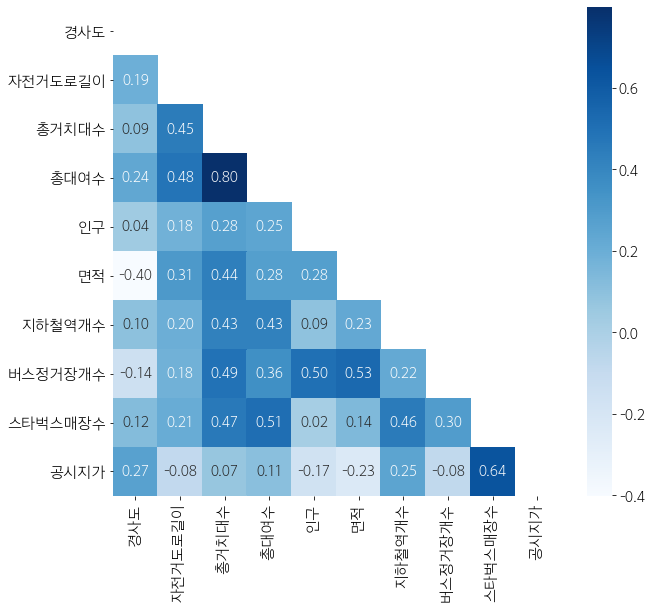

In [30]:
plt.figure(figsize=(10, 9))
plt.rc('font', size = 15)

mask = np.zeros_like(z.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (15,15) # 그림 크기 조정
sns.heatmap(data = z.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')
plt.show()

### 다중회귀분석 - 다중선형회귀

In [31]:
# 회귀계수
print(fitted_multi_model_1.params)

const      12328.292235
경사도          159.096908
자전거도로길이        1.789882
총거치대수        409.261453
인구             0.561675
지하철역개수      3382.586137
버스정거장개수     -305.330773
스타벅스매장수     4302.991262
공시지가          -0.002188
dtype: float64


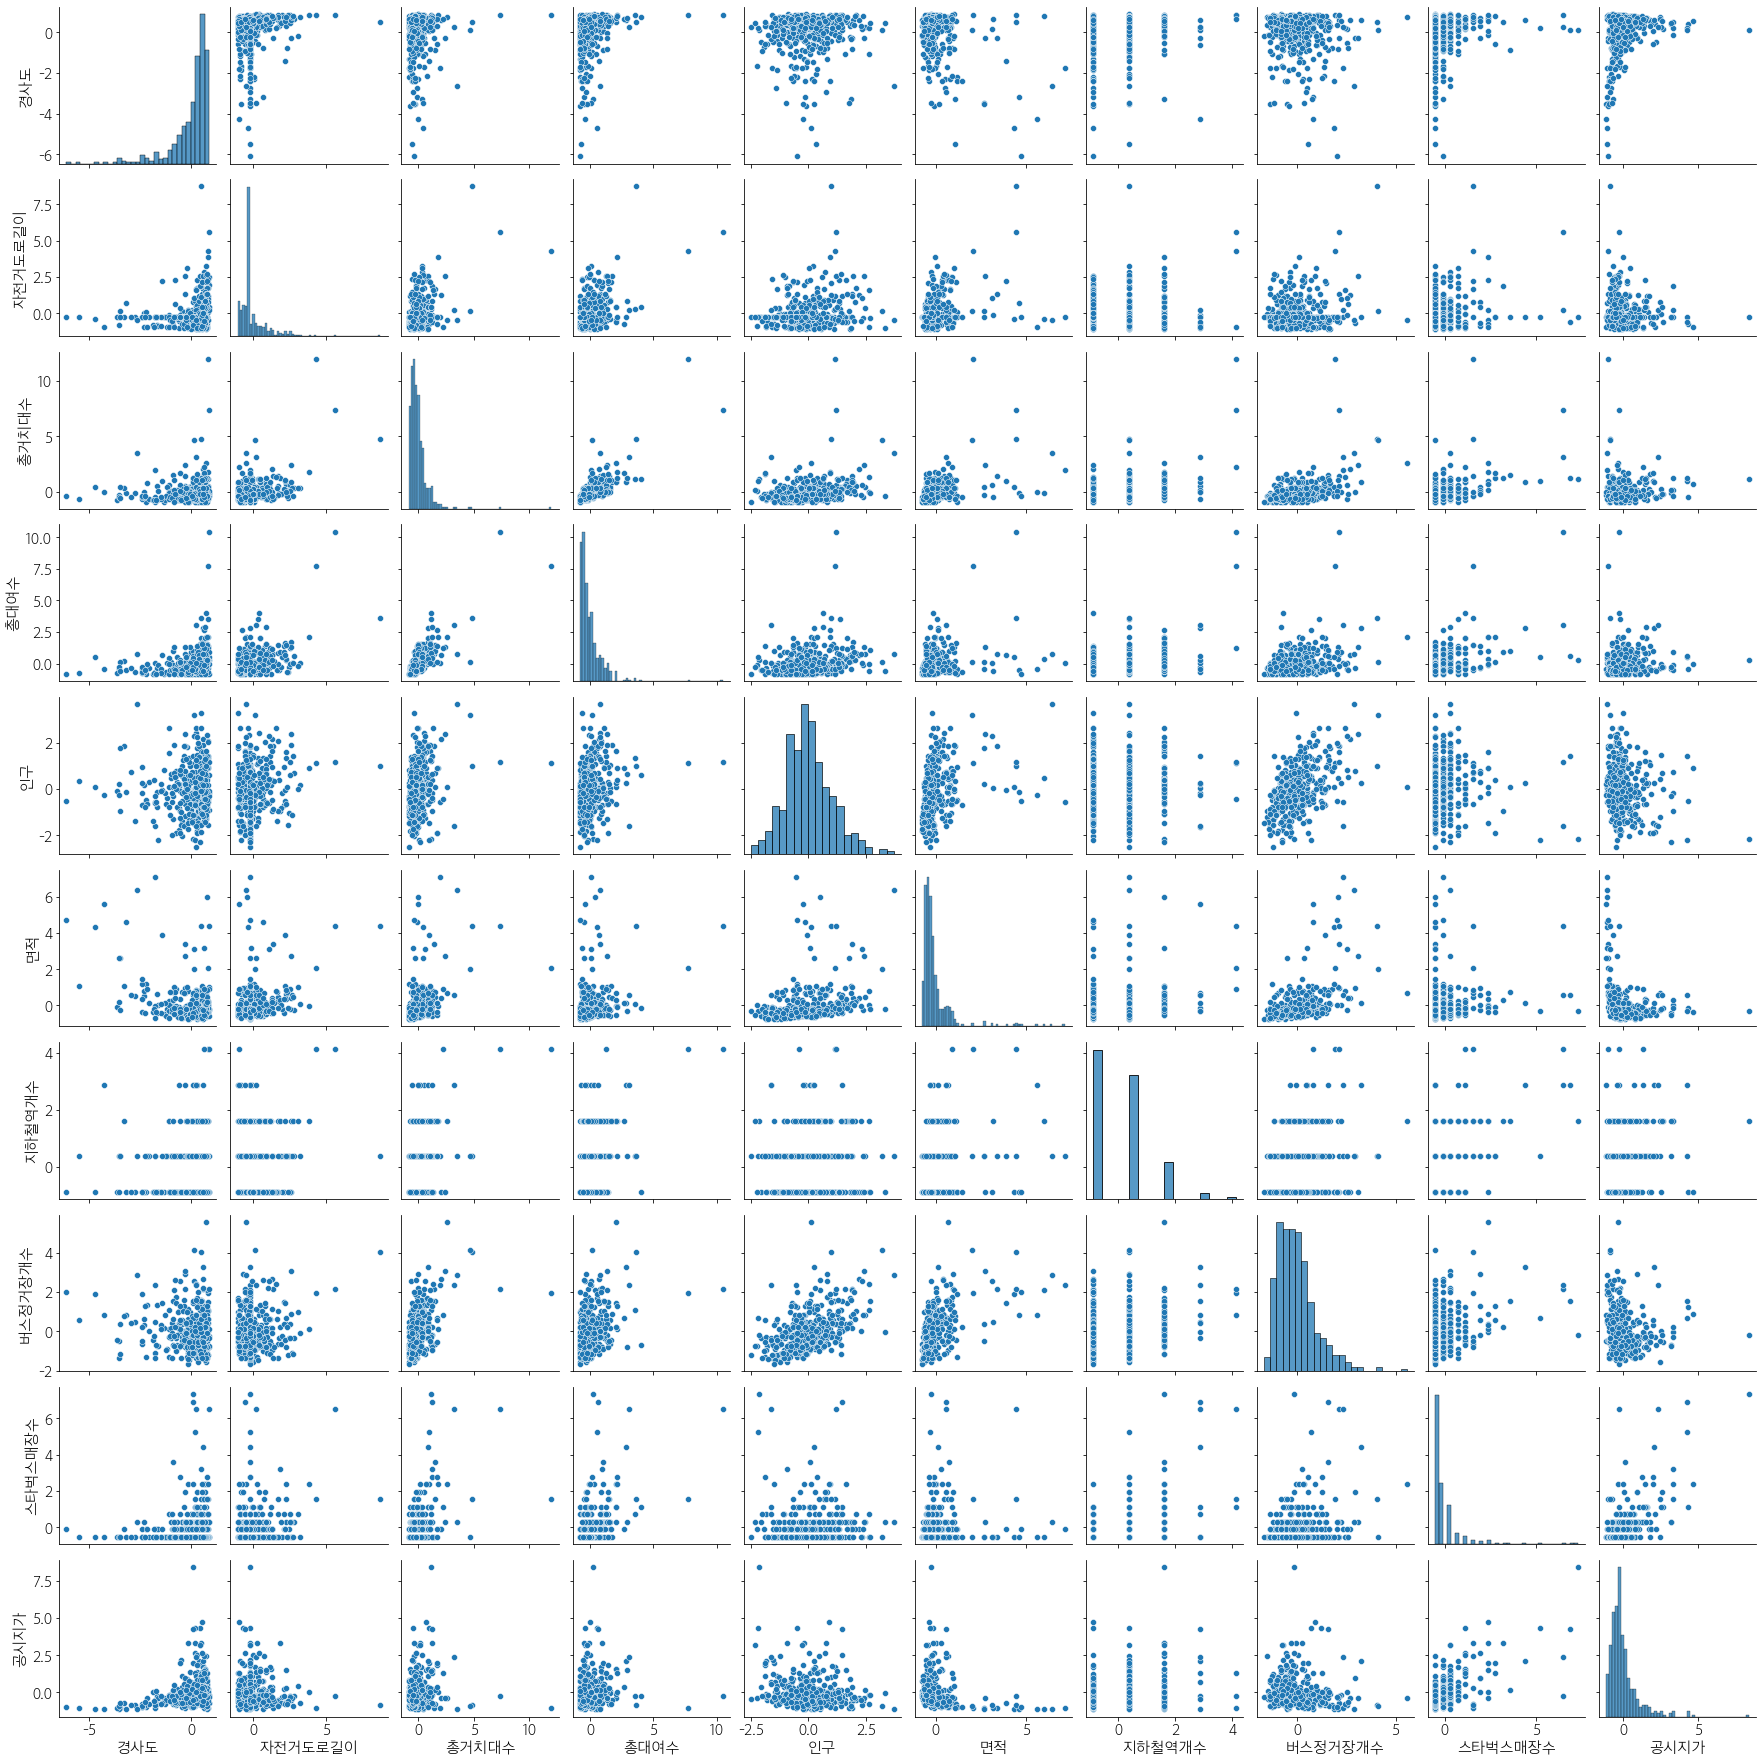

In [32]:
sns.pairplot(z)
plt.savefig("data/corr1.png")
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
# 10이상의 VIF factor는 VIF가 10보다 크면 다중공선성이 있다고 판단
# inf의 지하철역개수, 버스정거장개수, 교통편 하나씩 제거.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,17.080367,const
1,1.213639,경사도
2,1.378512,자전거도로길이
3,1.984796,총거치대수
4,1.438113,인구
5,1.366486,지하철역개수
6,1.874294,버스정거장개수
7,2.792255,스타벅스매장수
8,2.273887,공시지가


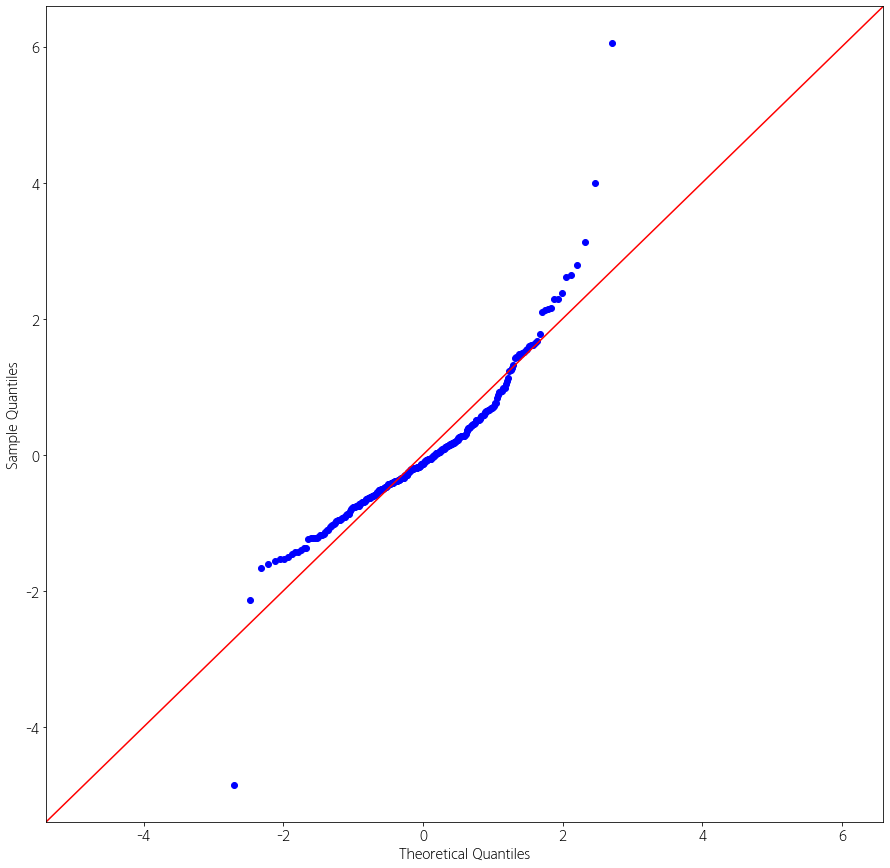

In [36]:
# 학습데이터의 잔차 확인

res = fitted_multi_model_1.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res, fit = True, line = '45')
plt.savefig("data/resid.png")

### 1. 전진선택법(step=1)

In [37]:
# MSE 구하기
from sklearn.metrics import mean_squared_error

x1 = all[['경사도', '자전거도로길이', '총거치대수', '인구', '면적', '지하철역개수', '버스정거장개수', '스타벅스매장수', '공시지가']]
target = all[['총대여수']]
x1_ = sm.add_constant(x1, has_constant = "add")

X = x1_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

#print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

# 회귀모델 적합
multi_model_1 = sm.OLS(train_y,train_x)
fitted_multi_model_1 = multi_model_1.fit()

mse1 = mean_squared_error(y_true = test_y["총대여수"], y_pred = fitted_multi_model_1.predict(test_x))

print(mse1)

1290601599.73804


In [38]:
import time
import itertools 

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

### 전진선택법 모델

def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X, y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [244]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed  9 models on 1 predictors in 0.059590816497802734
Selected predictors: ['총거치대수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDD7E52C08>
Processed  8 models on 2 predictors in 0.03075242042541504
Selected predictors: ['총거치대수', '경사도', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDCC29F48>
Processed  7 models on 3 predictors in 0.030203819274902344
Selected predictors: ['총거치대수', '경사도', '자전거도로길이', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDCB2E208>
Processed  6 models on 4 predictors in 0.017980337142944336
Selected predictors: ['총거치대수', '경사도', '자전거도로길이', '스타벅스매장수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDCB2E408>
Processed  5 models on 5 predictors in 0.01606917381286621
Selected predictors: ['총거치대수', '경사도', '자전거도로길이', '스타벅스매장수', '공시지가', 'const'] AIC:  <statsmodels.

In [245]:
Forward_best_model.aic

6903.264510031412

In [246]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총대여수   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     49.88
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           5.06e-50
Time:                        14:06:38   Log-Likelihood:                -3442.6
No. Observations:                 296   AIC:                             6903.
Df Residuals:                     287   BIC:                             6936.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총거치대수        409.2615     40.896     10.007      0.000     328.768     489.755
경사도          159.0969     46.591      3.415      0.001      67.393     250.800
자전거도로길이        1.7899      0.538      3.329      0.001       0.732       2.848
스타벅스매장수     4302.9913   1133.287      3.797      0.000    2072.383    6533.600
공시지가          -0.0022      0.001     -2.299      0.022      -0.004      -0.000
인구             0.5617      0.208      2.695      0.007       0.151       0.972
버스정거장개수     -305.3308    153.312     -1.992      0.047    -607.089      -3.573
지하철역개수      3382.5861   2240.339      1.510      0.132   -1026.993    7792.165
const       1.233e+04   6478.604      1.903      0.058    -423.312    2.51e+04
==============================================================================
Omnibus:                       90.800   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.560
Skew:                           1.079   Prob(JB):                    2.33e-126
Kurtosis:                       9.500   Cond. No.                     1.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. 후진소거법(step=1)

In [247]:
import time
import itertools 

def backward(X,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(X,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backward_model(X,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = X.columns.difference(['const'])
    BmodelBefore = processSubset(X,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])

In [248]:
Backward_best_model = backward_model(X=train_x, y= train_y)

Processed 9 models on 8 predictors in 0.053577423095703125
Selected predictors : ['경사도', '공시지가', '버스정거장개수', '스타벅스매장수', '인구', '자전거도로길이', '지하철역개수', '총거치대수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDF7E7208>
Processed 8 models on 7 predictors in 0.032784223556518555
Selected predictors : ['경사도', '공시지가', '버스정거장개수', '스타벅스매장수', '인구', '자전거도로길이', '총거치대수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDBAE0248>
Total elapsed time : 0.12225890159606934 seconds.


In [249]:
Backward_best_model.aic

6903.264510031412

In [250]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총대여수   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     49.88
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           5.06e-50
Time:                        14:06:42   Log-Likelihood:                -3442.6
No. Observations:                 296   AIC:                             6903.
Df Residuals:                     287   BIC:                             6936.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
경사도          159.0969     46.591      3.415      0.001      67.393     250.800
공시지가          -0.0022      0.001     -2.299      0.022      -0.004      -0.000
버스정거장개수     -305.3308    153.312     -1.992      0.047    -607.089      -3.573
스타벅스매장수     4302.9913   1133.287      3.797      0.000    2072.383    6533.600
인구             0.5617      0.208      2.695      0.007       0.151       0.972
자전거도로길이        1.7899      0.538      3.329      0.001       0.732       2.848
지하철역개수      3382.5861   2240.339      1.510      0.132   -1026.993    7792.165
총거치대수        409.2615     40.896     10.007      0.000     328.768     489.755
const       1.233e+04   6478.604      1.903      0.058    -423.312    2.51e+04
==============================================================================
Omnibus:                       90.800   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.560
Skew:                           1.079   Prob(JB):                    2.33e-126
Kurtosis:                       9.500   Cond. No.                     1.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3. 단계적선택법(Stepwise Selection)

In [251]:
def Stepwise_model(X,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(X,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const']))+1):
        forwardResult = forward(X,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(X,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])

In [252]:
Stepwise_best_model = Stepwise_model(X=train_x, y= train_y)

Processed  9 models on 1 predictors in 0.05299210548400879
Selected predictors: ['총거치대수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDC7E9088>
forward
Processed 1 models on 0 predictors in 0.005086421966552734
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDB3D49C8>
Processed  8 models on 2 predictors in 0.03411865234375
Selected predictors: ['총거치대수', '경사도', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDAE93948>
forward
Processed 2 models on 1 predictors in 0.01109170913696289
Selected predictors : ['총거치대수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001FDDB8A8588>
Processed  7 models on 3 predictors in 0.027195453643798828
Selected predictors: ['총거치대수', '경사도', '자전거도로길이', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00

In [253]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총대여수   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     49.88
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           5.06e-50
Time:                        14:06:45   Log-Likelihood:                -3442.6
No. Observations:                 296   AIC:                             6903.
Df Residuals:                     287   BIC:                             6936.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총거치대수        409.2615     40.896     10.007      0.000     328.768     489.755
경사도          159.0969     46.591      3.415      0.001      67.393     250.800
자전거도로길이        1.7899      0.538      3.329      0.001       0.732       2.848
스타벅스매장수     4302.9913   1133.287      3.797      0.000    2072.383    6533.600
공시지가          -0.0022      0.001     -2.299      0.022      -0.004      -0.000
인구             0.5617      0.208      2.695      0.007       0.151       0.972
버스정거장개수     -305.3308    153.312     -1.992      0.047    -607.089      -3.573
지하철역개수      3382.5861   2240.339      1.510      0.132   -1026.993    7792.165
const       1.233e+04   6478.604      1.903      0.058    -423.312    2.51e+04
==============================================================================
Omnibus:                       90.800   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.560
Skew:                           1.079   Prob(JB):                    2.33e-126
Kurtosis:                       9.500   Cond. No.                     1.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
# 성능평가
# number of params
print(Forward_best_model.params.shape,  Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(9,) (9,) (9,)


In [255]:
# 모델에 의해 예측된/추정된 값 = test_y

pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [258]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인할 예정

perf_mat = pd.DataFrame(columns=["FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'AIC'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['AIC']['FORWARD'] = Forward_best_model.aic
perf_mat.loc['AIC']['BACKWARD'] = Backward_best_model.aic
perf_mat.loc['AIC']['STEPWISE'] = Stepwise_best_model.aic

print(perf_mat)

          FORWARD     BACKWARD     STEPWISE
MSE   1.29907e+09  1.29907e+09  1.29907e+09
RMSE      36042.6      36042.6      36042.6
MAE       21589.9      21589.9      21589.9
AIC       6903.26      6903.26      6903.26


In [39]:
x1 = all[['경사도', '자전거도로길이', '총거치대수', '인구', '버스정거장개수', '스타벅스매장수', '공시지가']]
target = all[['총대여수']]

x1_ = sm.add_constant(x1, has_constant = "add")

X = x1_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

#print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

# 회귀모델 적합
multi_model_1 = sm.OLS(train_y,train_x)
fitted_multi_model_1 = multi_model_1.fit()

# 결과 출력
fitted_multi_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총대여수   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     56.42
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           1.98e-50
Time:                        19:12:32   Log-Likelihood:                -3443.8
No. Observations:                 296   AIC:                             6904.
Df Residuals:                     288   BIC:                             6933.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.391e+04   6407.653      2.171      0.031    1297.137    2.65e+04
경사도          160.7224     46.682      3.443      0.001      68.841     252.604
자전거도로길이        1.7326      0.537      3.224      0.001       0.675       2.790
총거치대수        418.8863     40.485     10.347      0.000     339.202     498.571
인구             0.5710      0.209      2.735      0.007       0.160       0.982
버스정거장개수     -307.4058    153.646     -2.001      0.046    -609.817      -4.995
스타벅스매장수     4672.3009   1109.032      4.213      0.000    2489.465    6855.136
공시지가          -0.0022      0.001     -2.350      0.019      -0.004      -0.000
==============================================================================
Omnibus:                       85.751   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.191
Skew:                           1.026   Prob(JB):                    2.21e-112
Kurtosis:                       9.122   Cond. No.                     1.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
# 10이상의 VIF factor는 VIF가 10보다 크면 다중공선성이 있다고 판단
# inf의 지하철역개수, 버스정거장개수, 교통편 하나씩 제거.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,16.841414,const
1,1.212860,경사도
2,1.378497,자전거도로길이
3,1.878544,총거치대수
4,1.437514,인구
5,1.874231,버스정거장개수
6,2.670375,스타벅스매장수
7,2.271805,공시지가


In [41]:
z = (all - all.mean(axis=0)) / all.std(axis=0)
display(z.head())

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,스타벅스매장수,공시지가
동,,,,,,,,,,
가락1동,0.673106,0.935292,0.687846,0.520405,0.439995,-0.055353,0.368904,-0.883370,0.306780,-0.759521
가락2동,0.069869,0.241056,-0.260995,-0.225681,1.104941,-0.295356,-0.882418,-0.224301,0.306780,0.540927
가락본동,0.286115,0.873418,-0.125447,-0.372759,0.457144,-0.187987,1.620225,-0.092487,0.306780,1.362655
가리봉동,0.513740,-0.250638,-0.735416,-0.733658,-0.896113,-0.649045,-0.882418,-1.146997,-0.516477,0.004971
가산동,0.738426,-0.495753,2.626195,2.071492,0.090481,0.689919,1.620225,5.575505,2.364921,-0.390474


In [42]:
z = z.drop(z.columns[[5]], axis=1)

In [46]:
z = z.drop(z.columns[[5]], axis=1)

In [47]:
display(z.head())

,경사도,자전거도로길이,총거치대수,총대여수,인구,버스정거장개수,스타벅스매장수,공시지가
동,,,,,,,,
가락1동,0.673106,0.935292,0.687846,0.520405,0.439995,-0.883370,0.306780,-0.759521
가락2동,0.069869,0.241056,-0.260995,-0.225681,1.104941,-0.224301,0.306780,0.540927
가락본동,0.286115,0.873418,-0.125447,-0.372759,0.457144,-0.092487,0.306780,1.362655
가리봉동,0.513740,-0.250638,-0.735416,-0.733658,-0.896113,-1.146997,-0.516477,0.004971
가산동,0.738426,-0.495753,2.626195,2.071492,0.090481,5.575505,2.364921,-0.390474


In [44]:
#z.corr(method='pearson')

In [45]:
# plt.figure(figsize=(10, 9))
# plt.rc('font', size = 15)

# mask = np.zeros_like(z.corr())
# mask[np.triu_indices_from(mask)] = True
# plt.rcParams["figure.figsize"] = (15,15) # 그림 크기 조정
# sns.heatmap(data = z.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')
# plt.show()

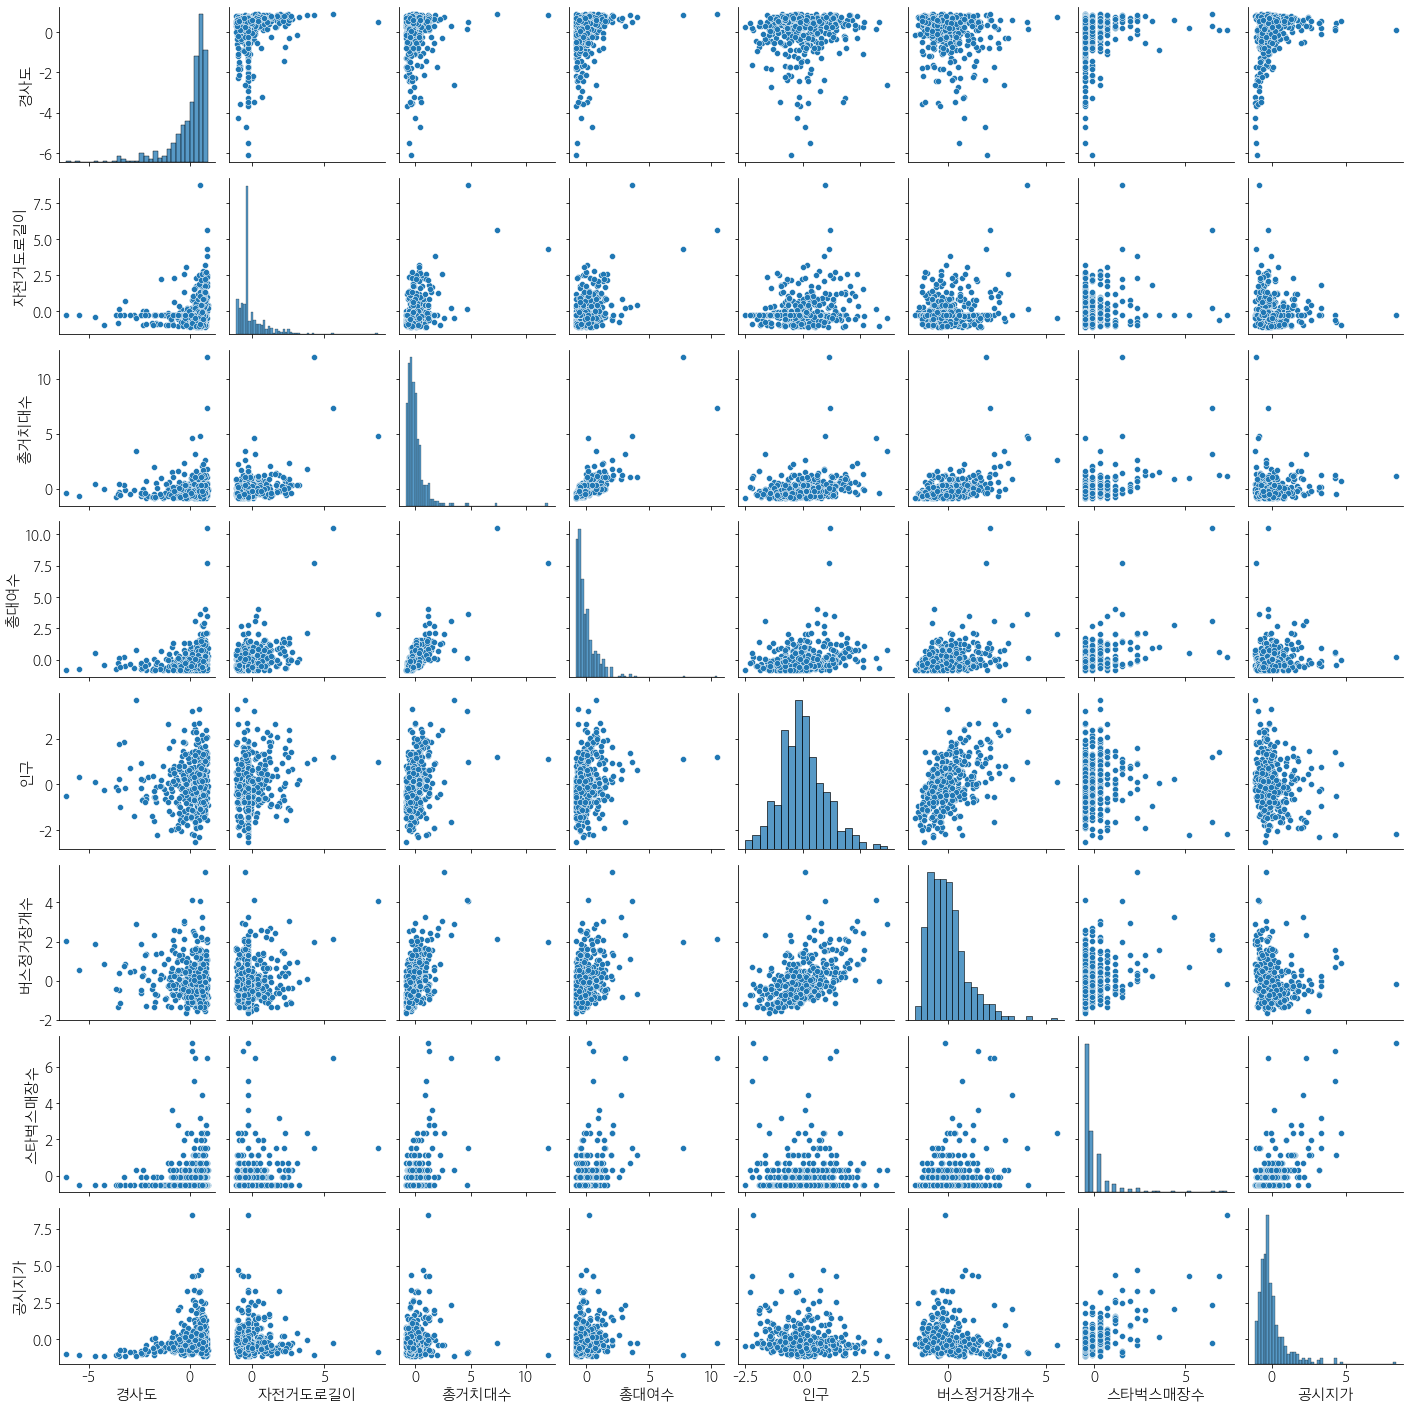

In [50]:
sns.pairplot(z)
plt.savefig("data/corr_2.png")
plt.show()